# Plot results


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

EXPERIMENT_FOR_MODEL = 4


gender_inference_random_forest = pd.read_csv('./sample/gender_inference_random_forest.csv', header=None)
gender_inference_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'roc auc'}, inplace=True)

gender_inference_logistic_regression = pd.read_csv('./sample/gender_inference_logistic_regression.csv', header=None)
gender_inference_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'roc auc'}, inplace=True)


### Gender inference

* observation

In [14]:
observation_gender_inference_random_forest = gender_inference_random_forest.iloc[0].to_frame().tail(5)
observation_gender_inference_random_forest.rename(columns={0: 'Random Forest'}, inplace=True)
observation_gender_inference_logistic_regression = gender_inference_logistic_regression.iloc[0].to_frame().tail(5)
observation_gender_inference_logistic_regression.rename(columns={0: 'Logistic Regression'}, inplace=True)

observation_gender_inference_random_forest_merged = pd.concat([observation_gender_inference_random_forest,
                                                              observation_gender_inference_logistic_regression], axis=1)

observation_gender_inference_random_forest_merged = observation_gender_inference_random_forest_merged

observation_gender_inference_random_forest_merged

,Random Forest,Logistic Regression
balanced acc,0.987978,0.5
f1,0.986855,0.0
precision,0.988957,0.0
recall,0.984762,0.0
roc auc,0.987978,0.5


Text(0.5, 0, 'Dataset')

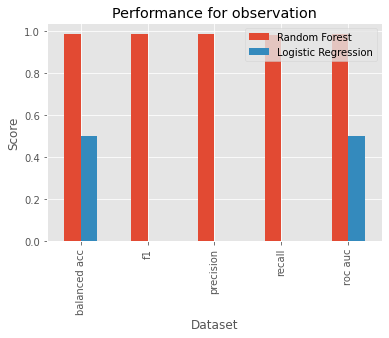

In [15]:
plt.style.use('ggplot')
observation_gender_inference_random_forest_merged.plot(kind='bar')
plt.title('Performance for observation')
plt.ylabel('Score')
plt.xlabel('Dataset')


##### For each recommendation model show performance at each step of the pipeline



* user KNN


In [16]:
current_experiment = 0
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
userKNN_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
userKNN_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
userKNN_model_performance_random_forest

,index,dataset,balanced acc,f1,precision,recall,roc auc
0,1,user-knn_relevance,0.731131,0.730988,0.732231,0.729749,0.731131
1,2,user-knn_classification_best_10,0.686183,0.688962,0.682105,0.695958,0.686183
2,3,user-knn_classification_best_20,0.695792,0.696856,0.692516,0.701252,0.695792
3,4,user-knn_classification_best_50,0.733999,0.733716,0.735353,0.732086,0.733999


In [17]:
metrics = ['balanced acc', 'f1', 'precision', 'recall', 'roc auc']

def perform_plot(random_forest, logistic_regression, metric, model_name, kind='line'):
    plt.figure()
    plt.style.use('ggplot')
    random_forest[metric].plot(kind=kind)
    logistic_regression[metric].plot(kind=kind)
    plt.title(metric + ' in ' + model_name + ' pipeline')
    indices = range(random_forest.shape[0])
    labels = random_forest['dataset'].to_list()
    plt.xticks(indices, labels, rotation=90)


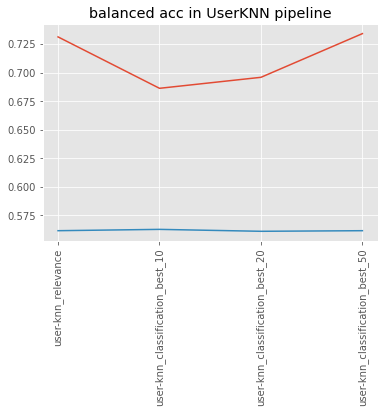

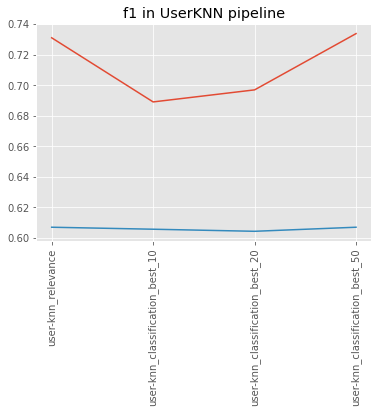

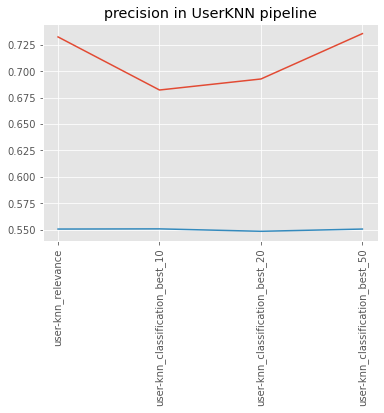

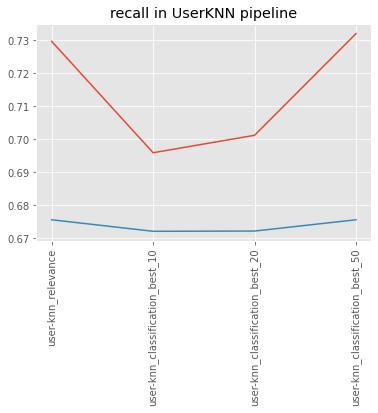

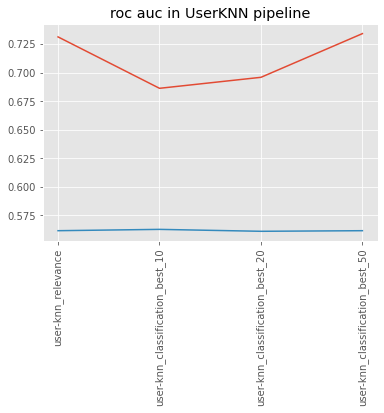

In [18]:
for m in metrics:
    perform_plot(userKNN_model_performance_random_forest, userKNN_model_performance_logistic_regression, m, 'UserKNN')

* item KNN

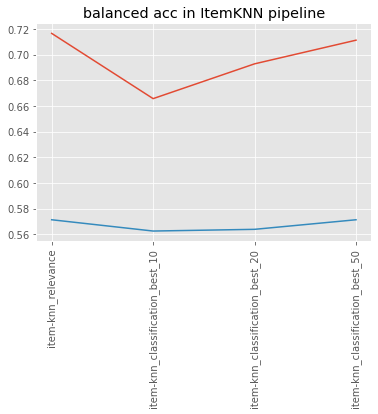

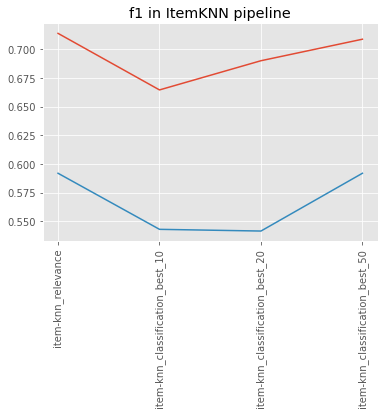

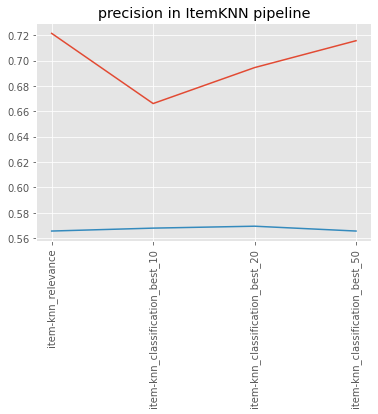

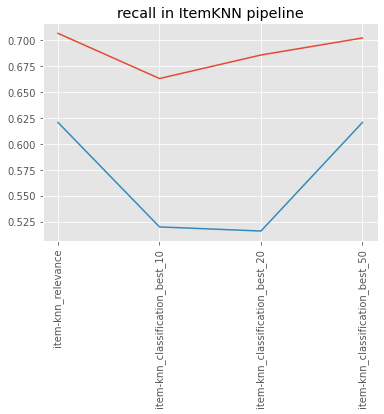

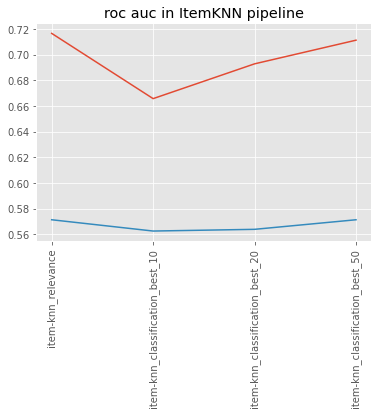

In [19]:
current_experiment = 1
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
itemKNN_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
itemKNN_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(itemKNN_model_performance_random_forest, itemKNN_model_performance_logistic_regression, m, 'ItemKNN')

* most popular

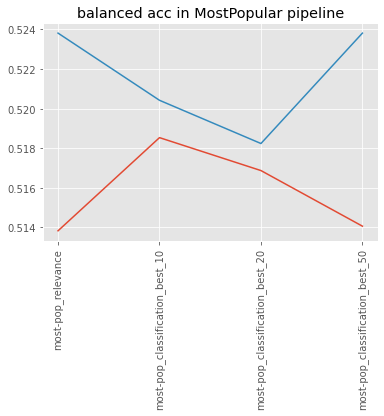

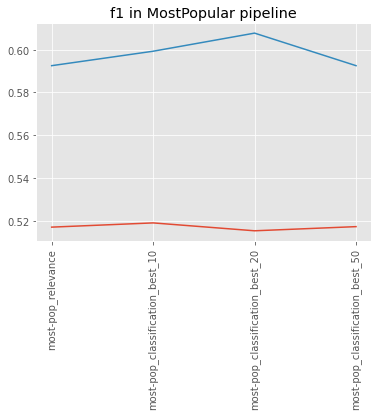

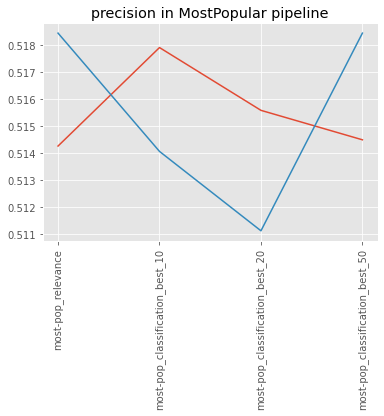

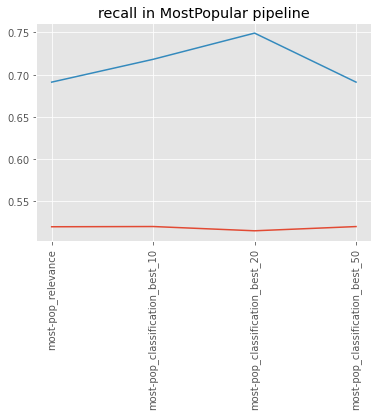

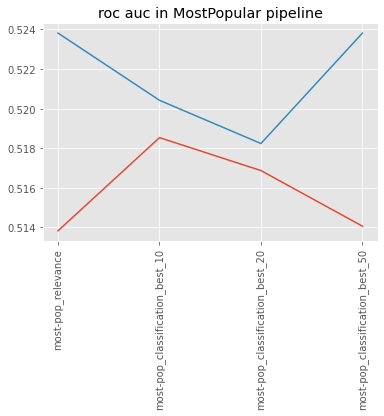

In [20]:
current_experiment = 2
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
most_pop_model_performance_random_forest = gender_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
most_pop_model_performance_logistic_regression = gender_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(most_pop_model_performance_random_forest, most_pop_model_performance_logistic_regression, m, 'MostPopular')

##### For each step of the pipeline show performance of recommendation models

* relevance

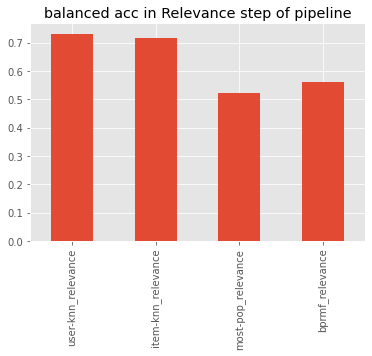

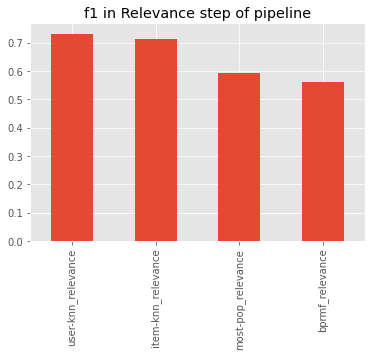

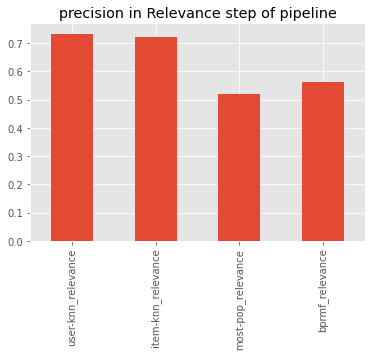

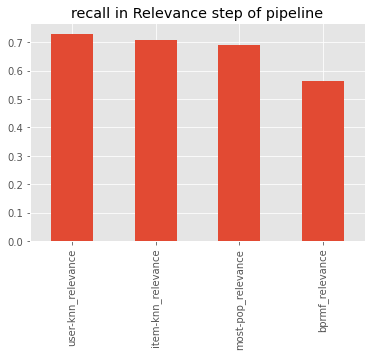

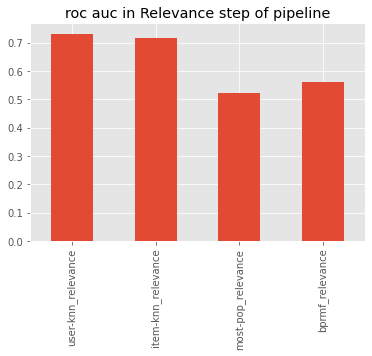

In [21]:
current_step = 0
first_item = 1 + current_step
relevance_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
relevance_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(relevance_random_forest, relevance_logistic_regression, m, 'Relevance step of', kind='bar')

* classification best 10

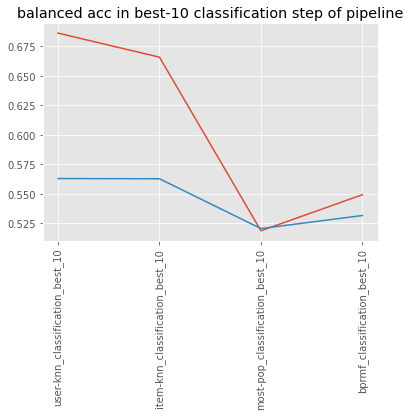

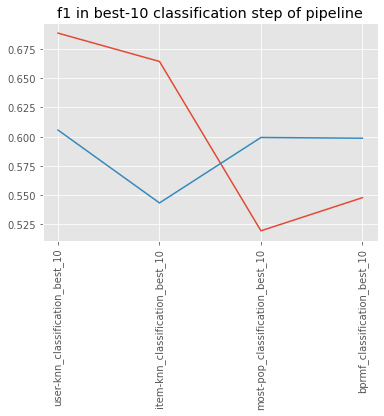

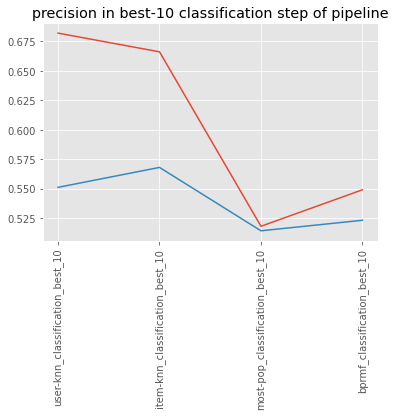

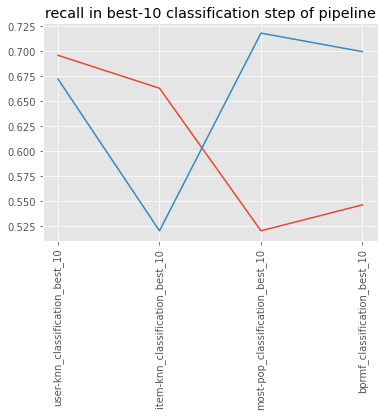

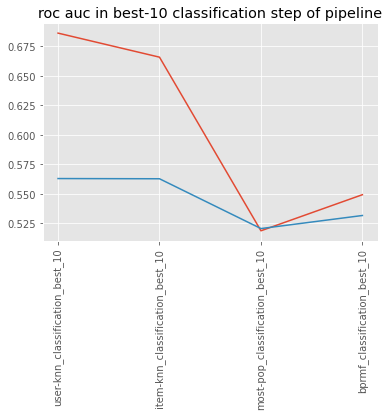

In [22]:
current_step = 1
first_item = 1 + current_step
best10_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best10_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best10_random_forest, best10_logistic_regression, m, 'best-10 classification step of')

classification best 20

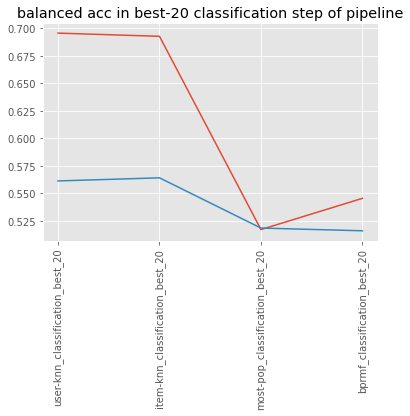

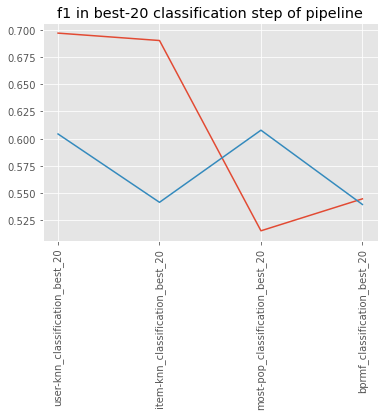

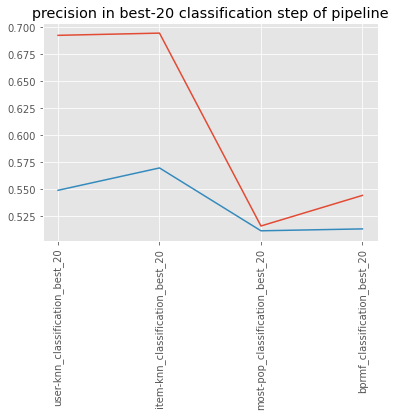

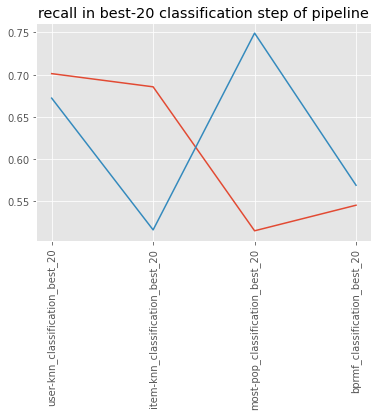

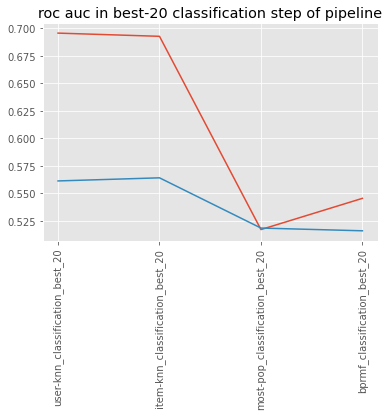

In [23]:
current_step = 2
first_item = 1 + current_step
best20_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best20_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best20_random_forest, best20_logistic_regression, m, 'best-20 classification step of')

* classification best 50

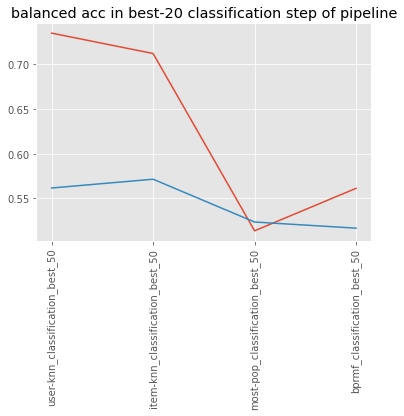

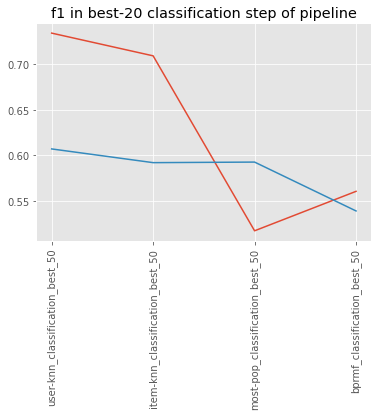

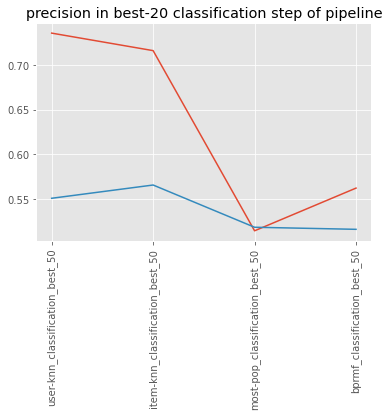

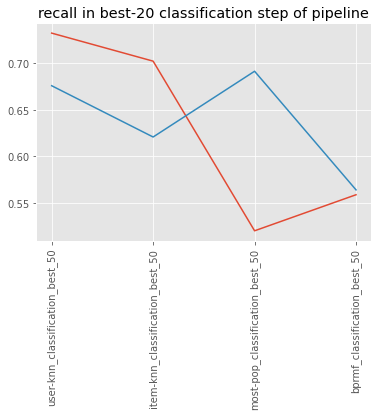

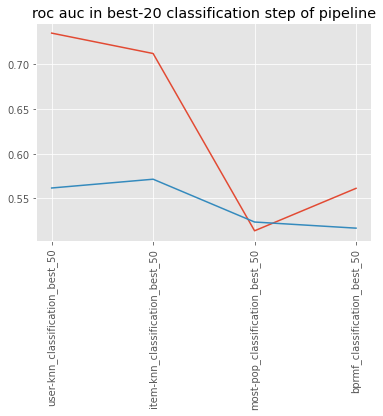

In [24]:

current_step = 3
first_item = 1 + current_step
best50_random_forest = gender_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best50_logistic_regression = gender_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best50_random_forest, best50_logistic_regression, m, 'best-20 classification step of')
